# Homework 9 - Advanced Data Analysis
1. The regression results tend to generate residuals that are correlated with the dependent variable. This indicates that the regression is missing an explanatory variable that better captures the magnitude of changes in RGDP. Find a variable that improves prediction of RGDP per capita. Rerun all results presented in the panel regression section with this variable included.

In [37]:
data = pd.read_csv("fraserDataWithRGDPPC.csv",
                  index_col = ["ISO_Code_3", "Year"]).rename(columns = {"Summary":"EFW"})
del data["Standard Deviation of the 5 EFW Areas"]
diff_keys = list(data.keys())[-7:]
diff_keys

['EFW',
 'Size of Government',
 'Legal System and Property Rights',
 'Sound Money',
 'Freedom to Trade Internationally',
 'Regulation',
 'RGDP Per Capita']

## 1.

In [38]:
import matplotlib.pyplot as plt
import numpy as np
import statsmodels.api as sm

In [39]:
diff_index = data[diff_keys].groupby(level=0).diff(-1).dropna().index  
data_dict = {}  
data_dict["Data"] = data[data.index.get_level_values("Year")>1999]
data_dict["Data"]["RGDP Per Capita"] = np.log(data_dict["Data"]["RGDP Per Capita"]).groupby("ISO_Code_3").diff()
data_dict["Diff Data"] = data_dict["Data"]
data_dict["Diff Data"][diff_keys] = data_dict["Diff Data"][diff_keys].groupby(level=0).diff(-1)  
data_dict["Diff Data"]["North America"] = 1
data_dict["Diff Data"] = data_dict["Diff Data"].dropna()

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\3323279350.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict["Data"]["RGDP Per Capita"] = np.log(data_dict["Data"]["RGDP Per Capita"]).groupby("ISO_Code_3").diff()
C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\3323279350.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_dict["Diff Data"][diff_keys] = data_dict["Diff Data"][diff_keys].groupby(level=0).diff(-1)
C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\3323279350.py:7: SettingWit

Data
Entity = True
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0185
Estimator:                   PanelOLS   R-squared (Between):             -0.0400
No. Observations:                1882   R-squared (Within):               0.0133
Date:                Mon, May 06 2024   R-squared (Overall):              0.0134
Time:                        23:59:09   Log-likelihood                    3329.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.3896
Entities:                         149   P-value                           0.0000
Avg Obs:                       12.631   Distribution:                  F(6,1714)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):            

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lagged"] = reg_data.groupby("Countries")["RGDP Per Capita"].shift(3)
C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  

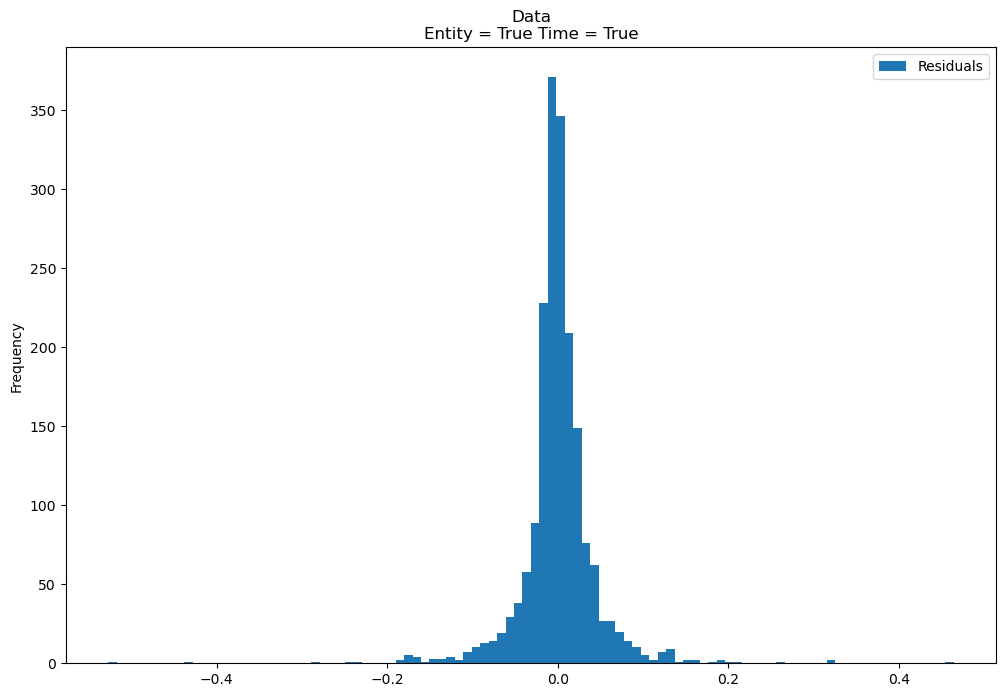

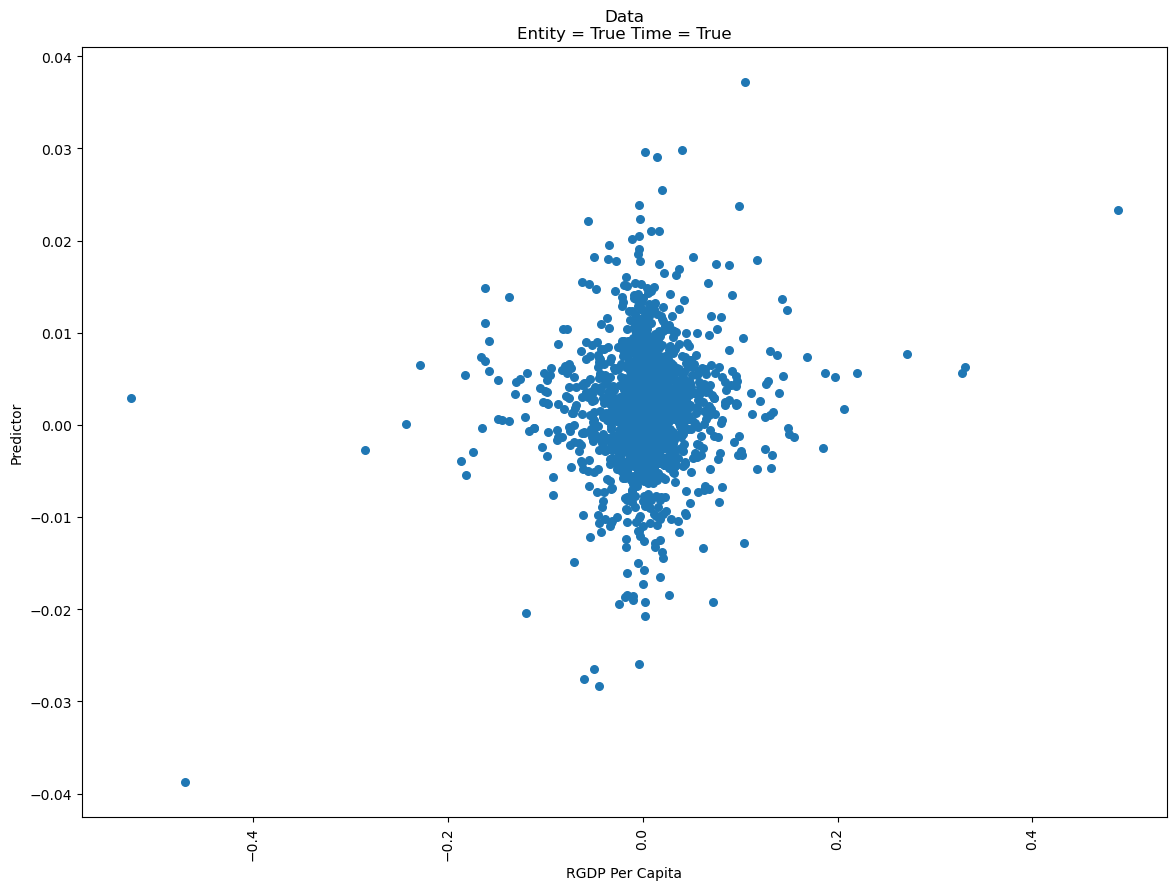

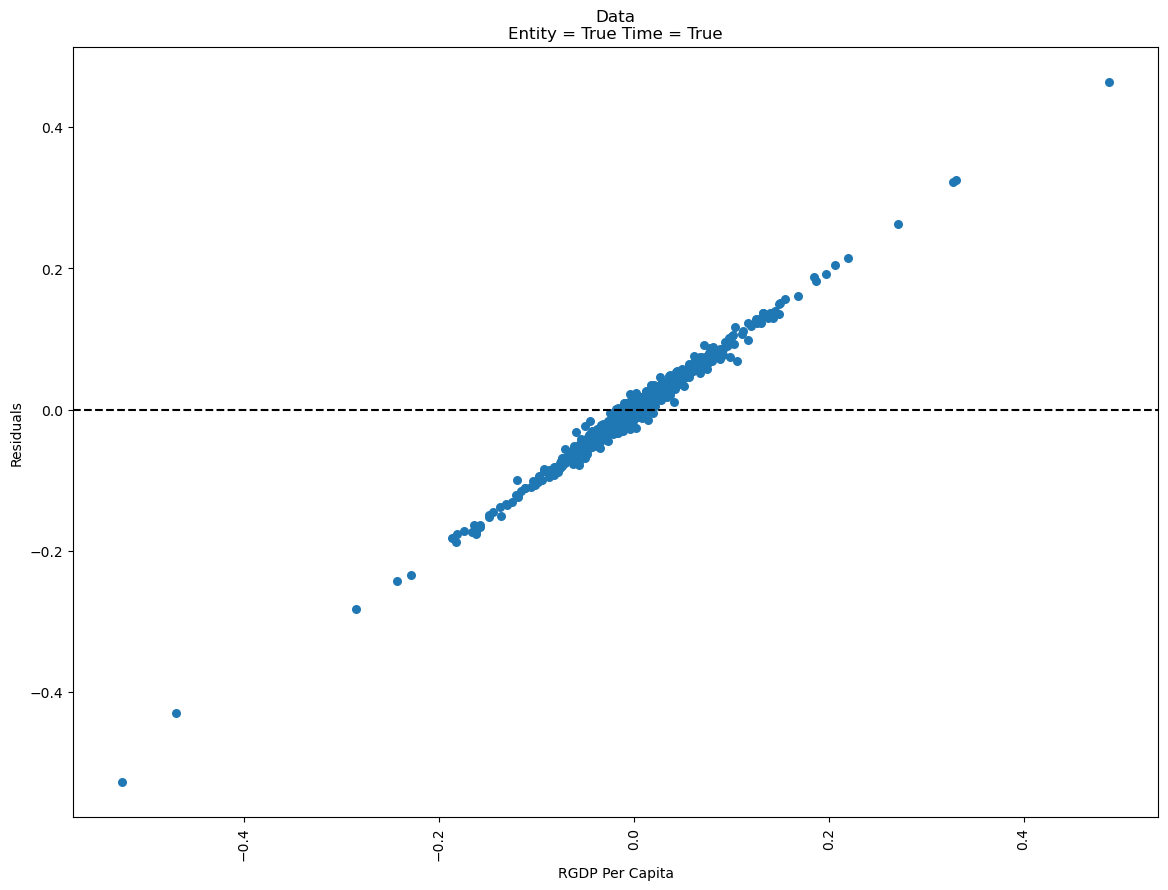

Data
Entity = True
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0159
Estimator:                   PanelOLS   R-squared (Between):              0.0667
No. Observations:                1882   R-squared (Within):               0.0159
Date:                Mon, May 06 2024   R-squared (Overall):              0.0169
Time:                        23:59:11   Log-likelihood                    3145.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.6398
Entities:                         149   P-value                           0.0001
Avg Obs:                       12.631   Distribution:                  F(6,1727)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):           

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lagged"] = reg_data.groupby("Countries")["RGDP Per Capita"].shift(3)
C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  

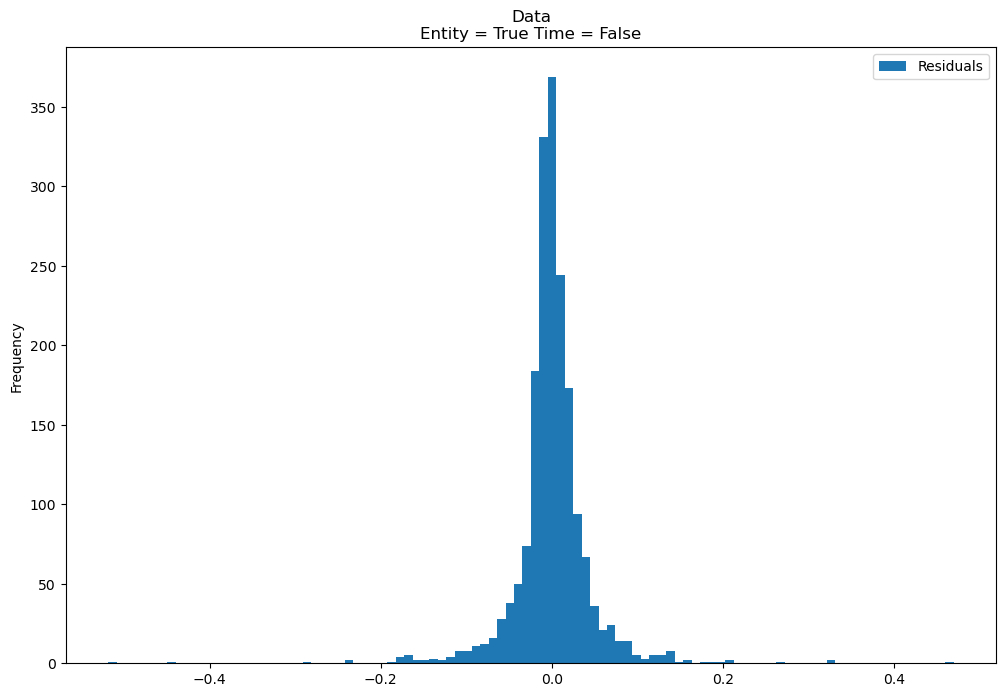

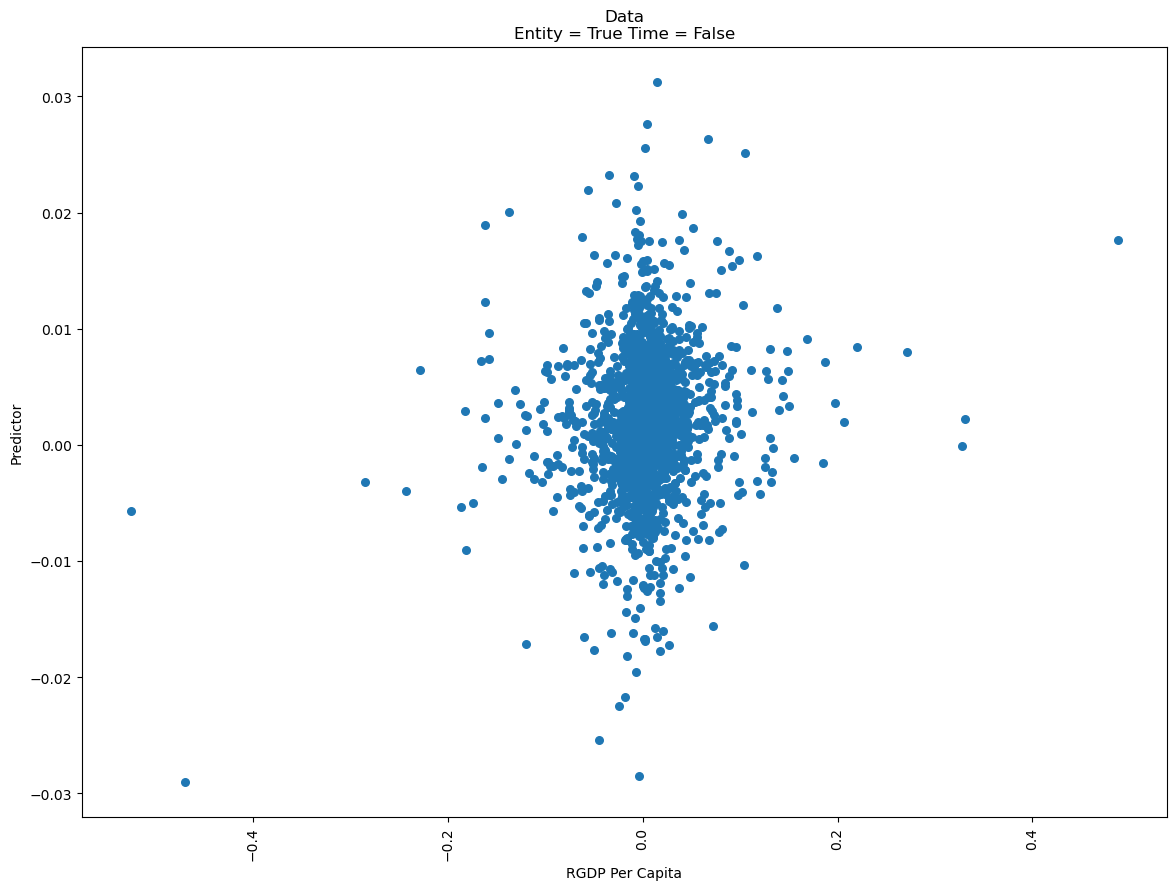

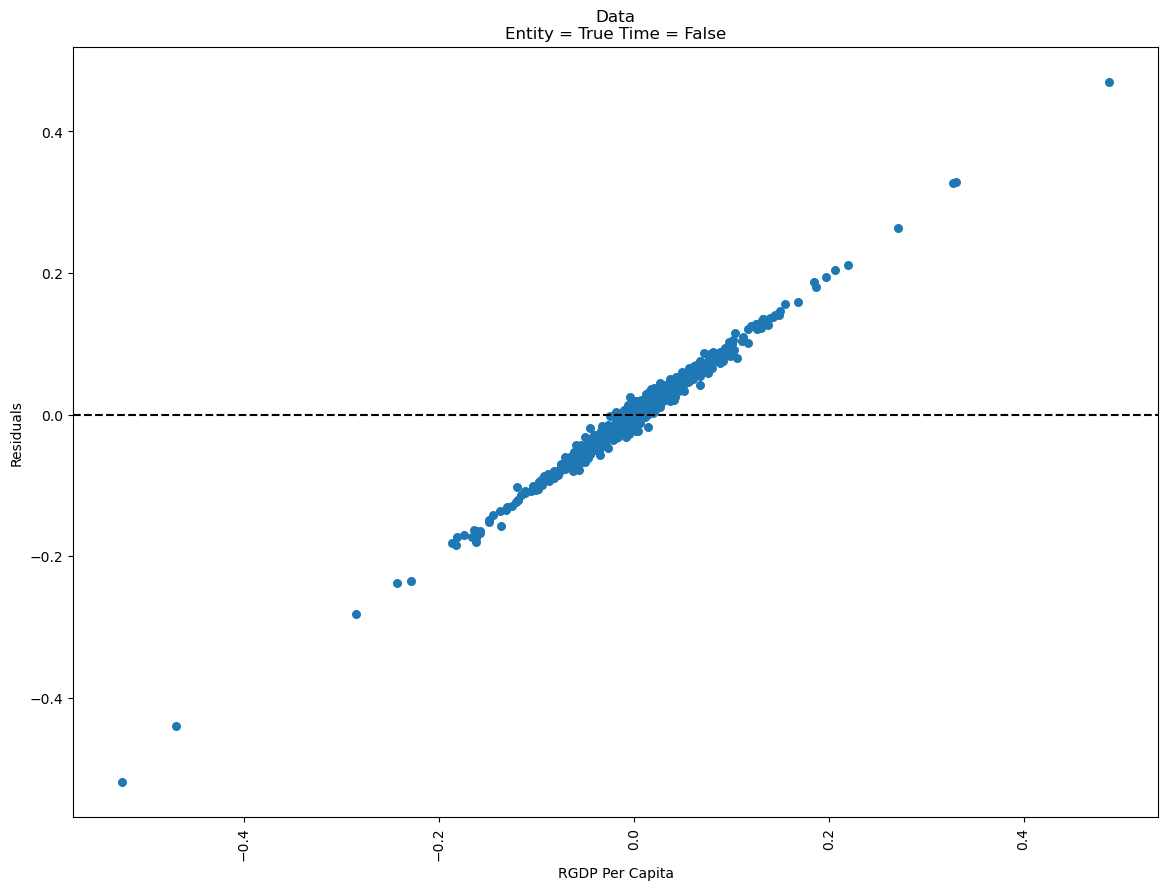

Data
Entity = False
Time = True
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0192
Estimator:                   PanelOLS   R-squared (Between):              0.0911
No. Observations:                1882   R-squared (Within):               0.0139
Date:                Mon, May 06 2024   R-squared (Overall):              0.0150
Time:                        23:59:13   Log-likelihood                    3315.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.0831
Entities:                         149   P-value                           0.0000
Avg Obs:                       12.631   Distribution:                  F(6,1862)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):           

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lagged"] = reg_data.groupby("Countries")["RGDP Per Capita"].shift(3)
C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  

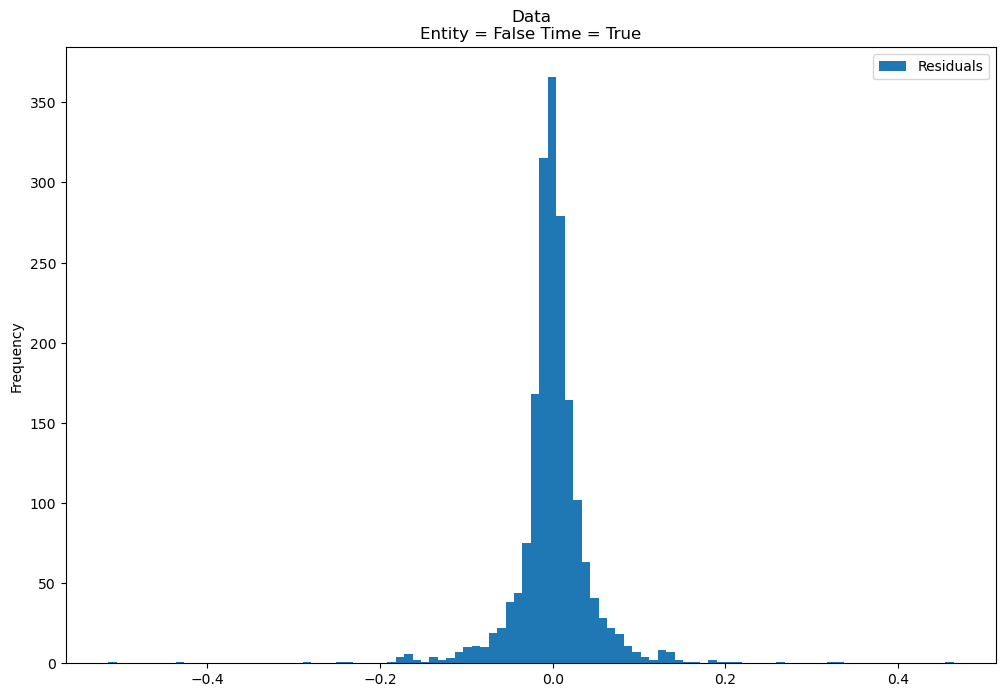

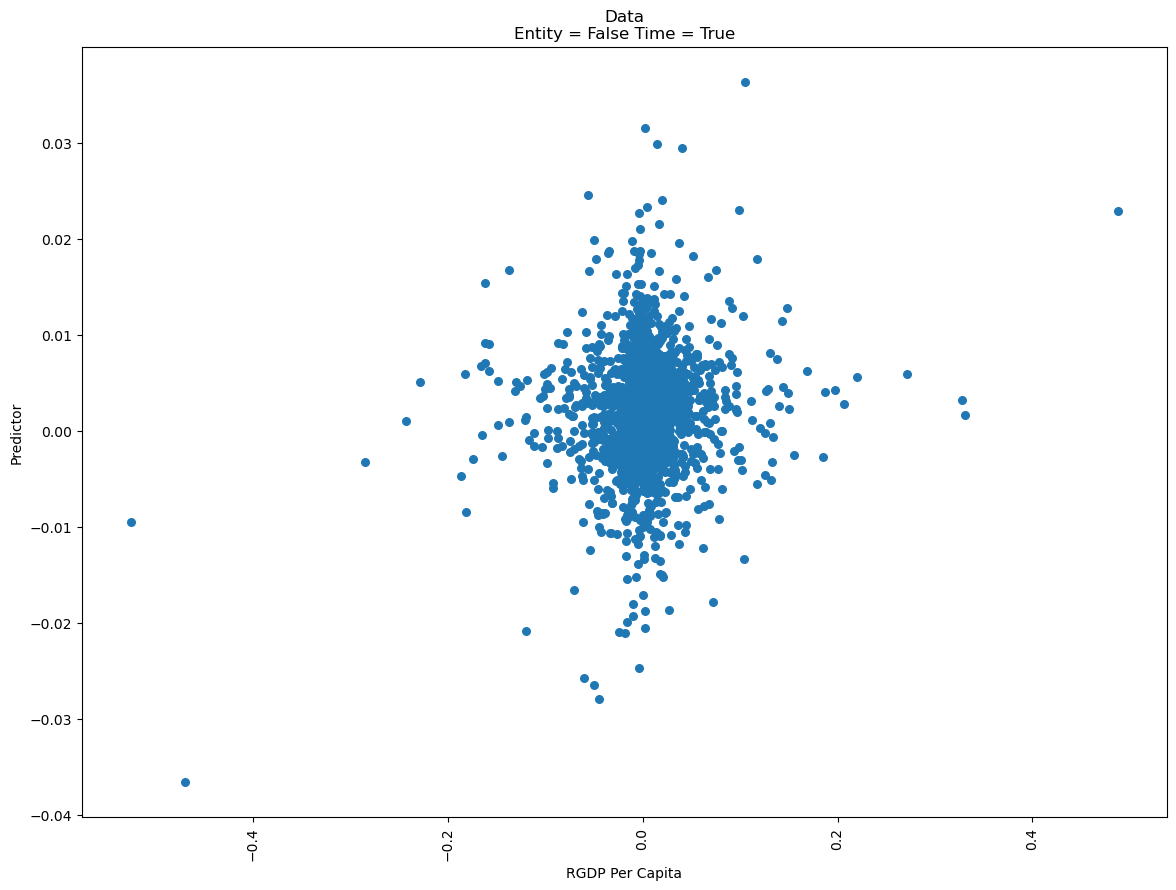

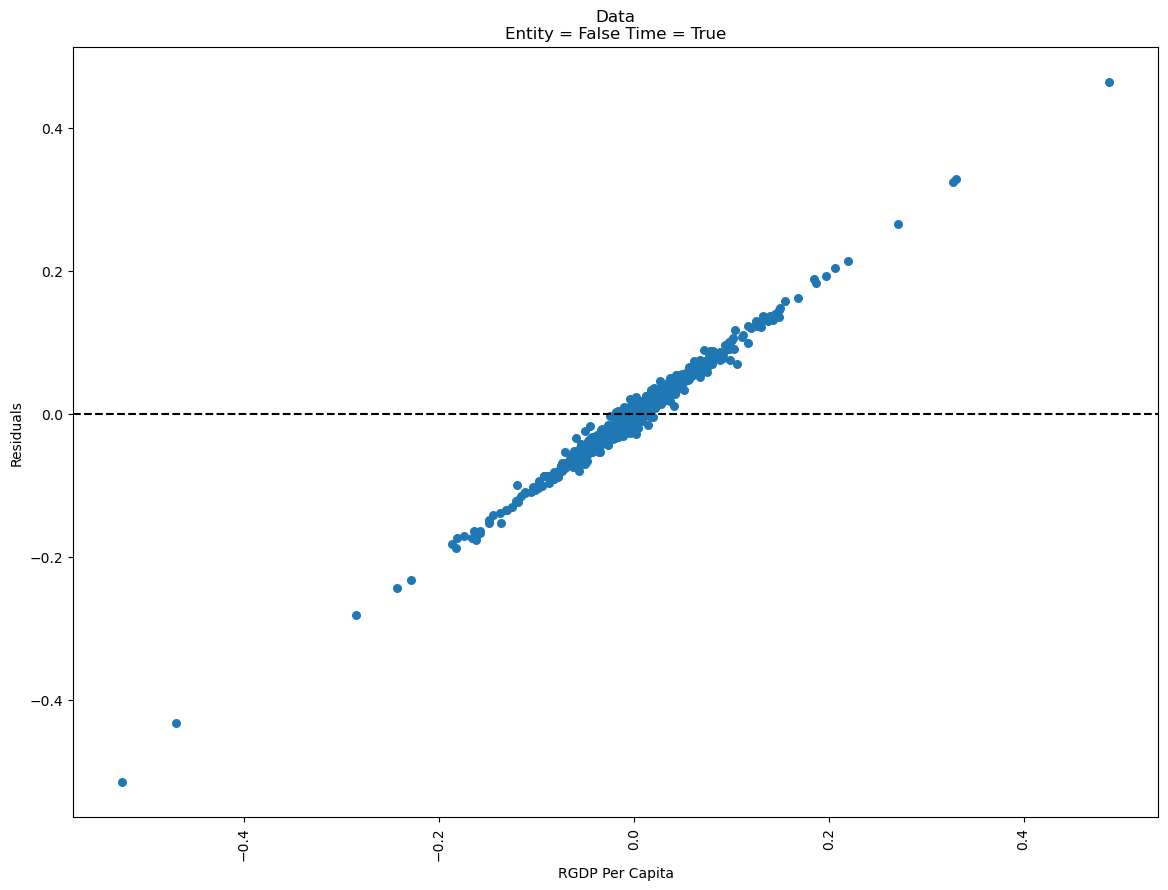

Data
Entity = False
Time = False
Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0173
Estimator:                   PanelOLS   R-squared (Between):              0.1713
No. Observations:                1882   R-squared (Within):               0.0155
Date:                Mon, May 06 2024   R-squared (Overall):              0.0173
Time:                        23:59:15   Log-likelihood                    3134.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.4863
Entities:                         149   P-value                           0.0000
Avg Obs:                       12.631   Distribution:                  F(6,1875)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):          

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reg_data["RGDP Per Capita Lagged"] = reg_data.groupby("Countries")["RGDP Per Capita"].shift(3)
C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  

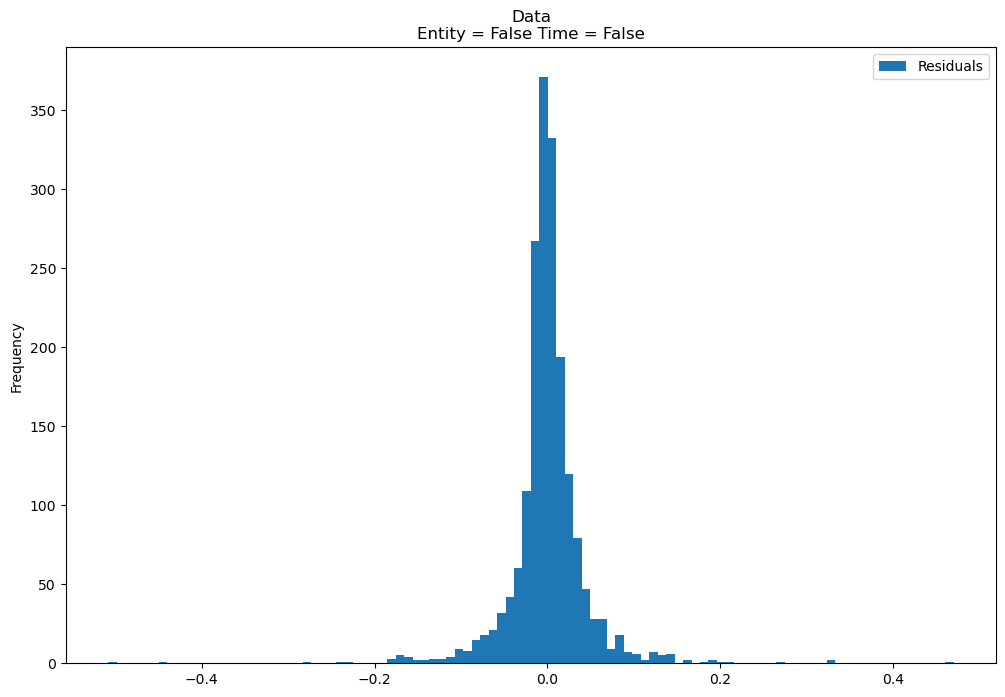

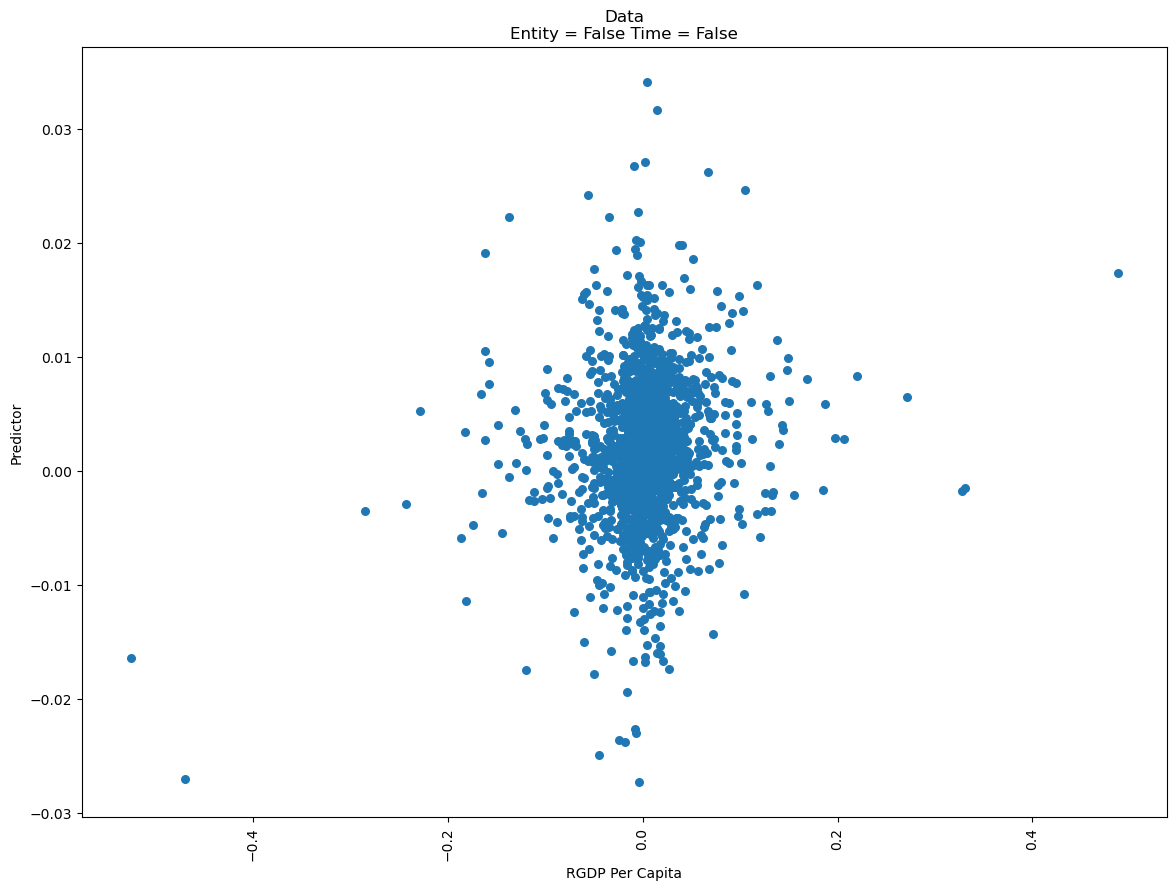

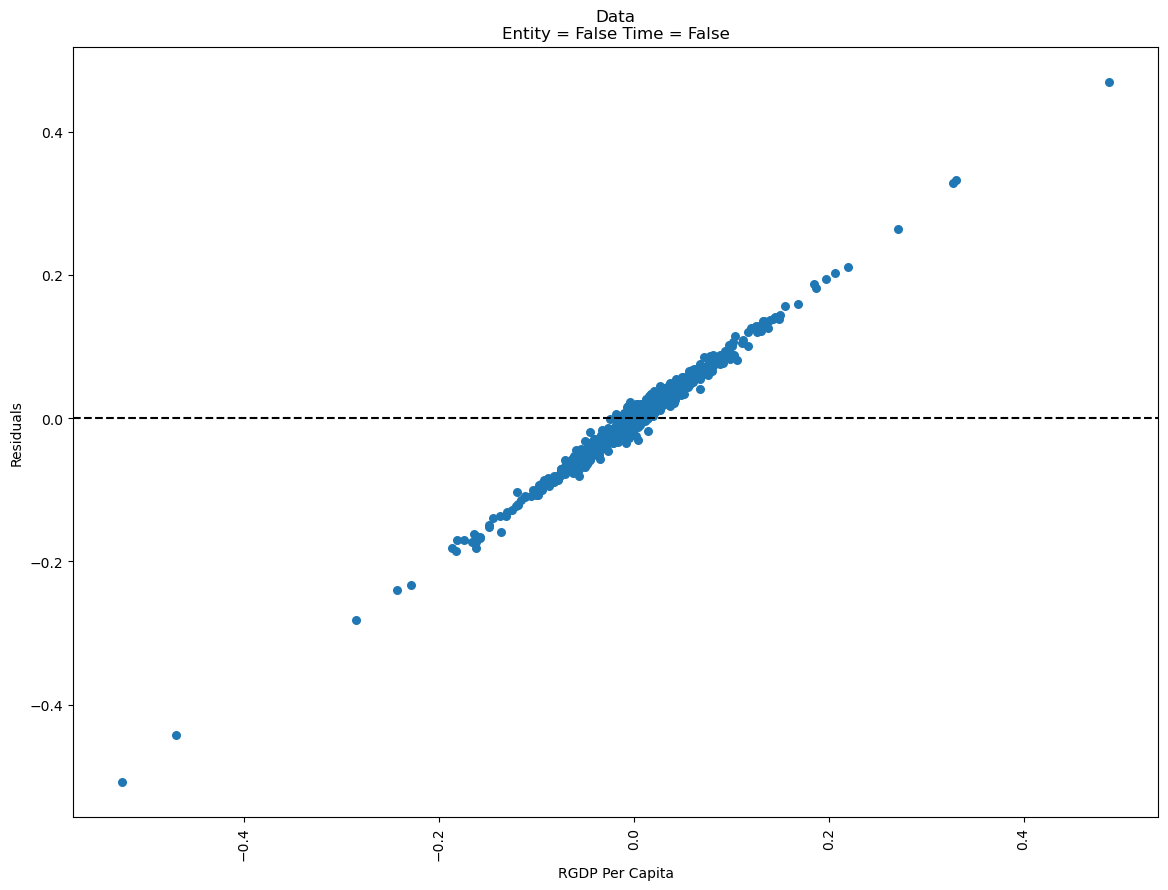

Diff Data
Entity = True
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0185
Estimator:                   PanelOLS   R-squared (Between):             -0.0400
No. Observations:                1882   R-squared (Within):               0.0133
Date:                Mon, May 06 2024   R-squared (Overall):              0.0134
Time:                        23:59:16   Log-likelihood                    3329.6
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.3896
Entities:                         149   P-value                           0.0000
Avg Obs:                       12.631   Distribution:                  F(6,1714)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):  

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


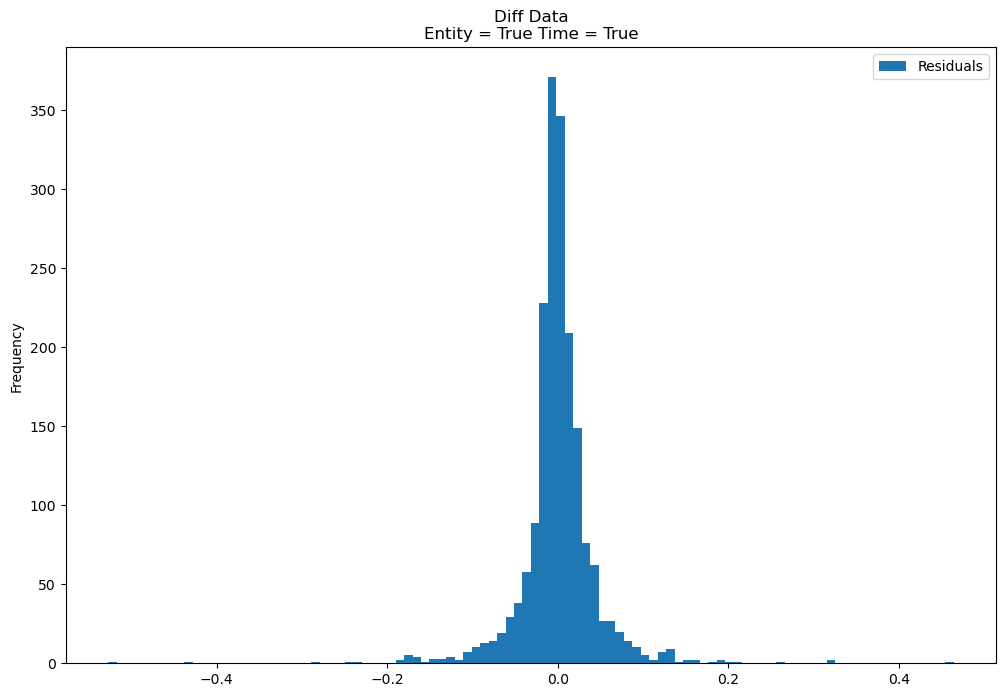

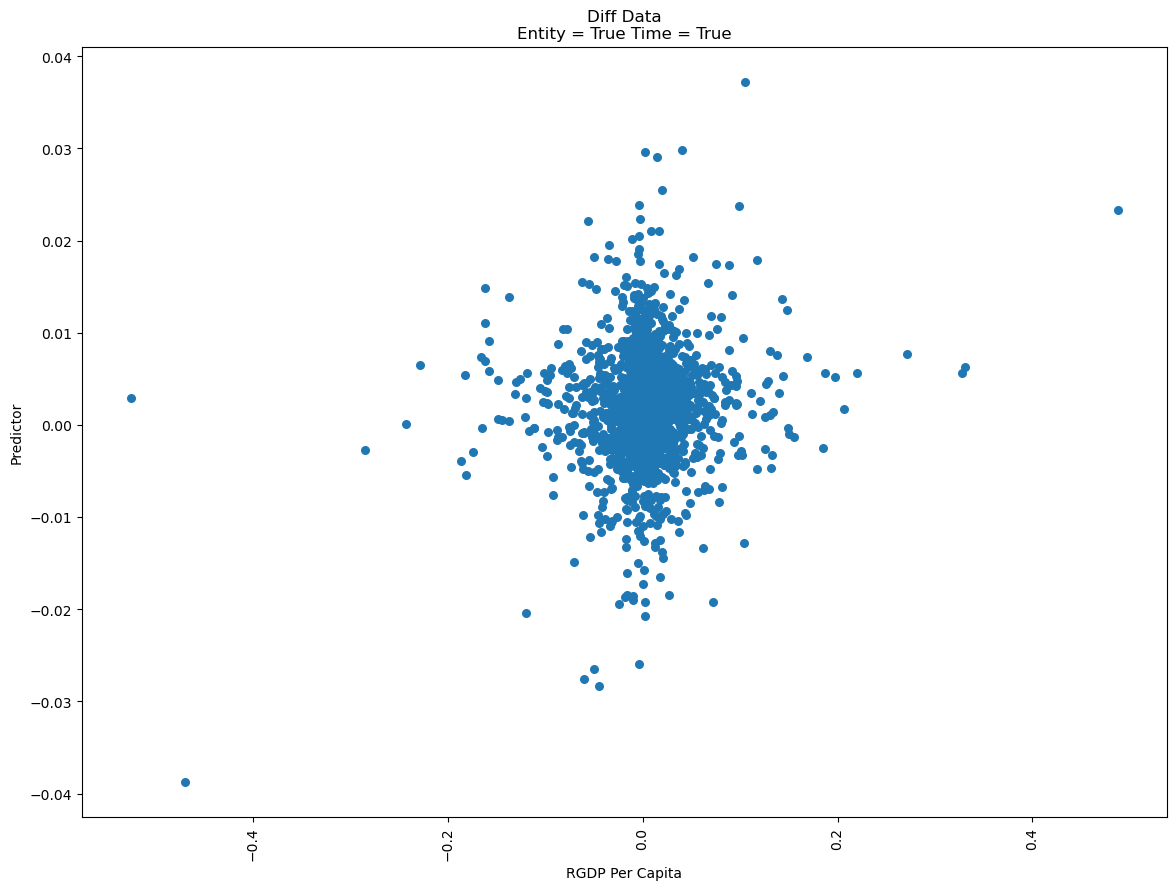

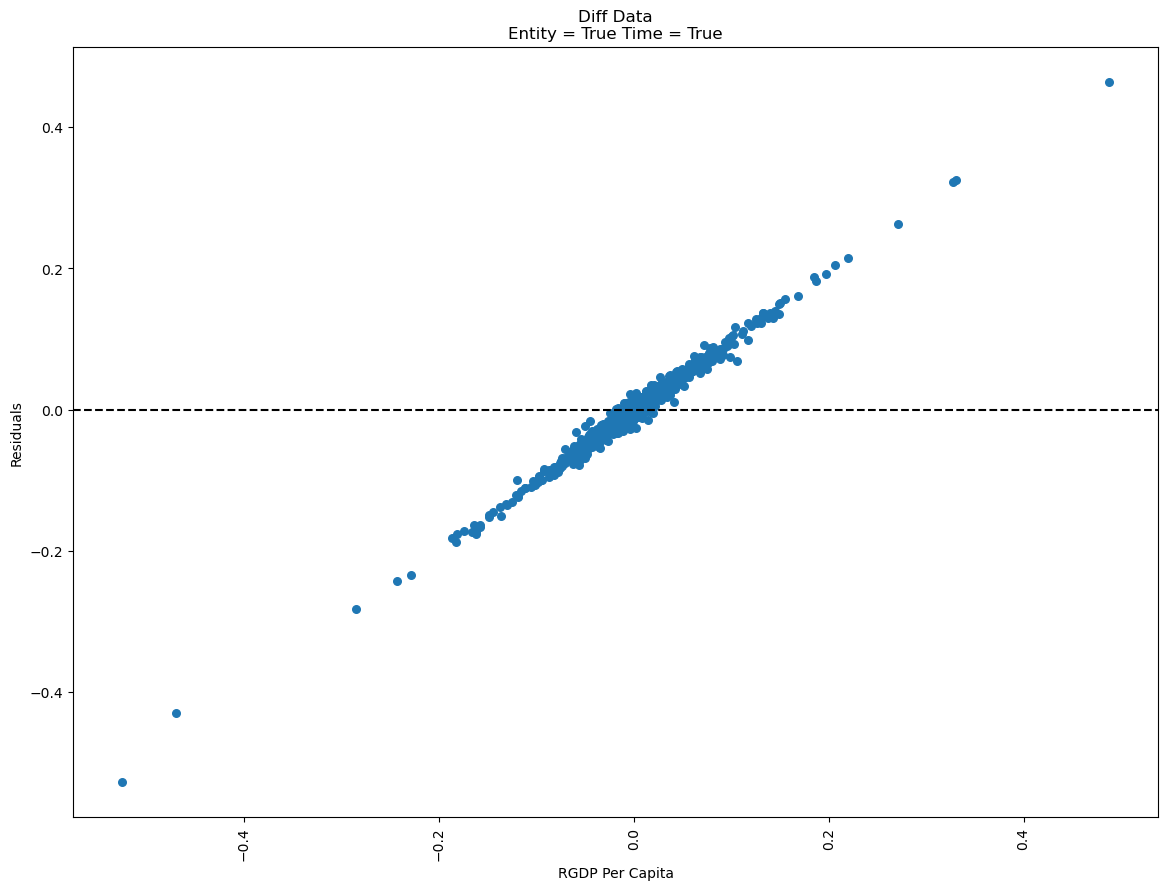

Diff Data
Entity = True
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0159
Estimator:                   PanelOLS   R-squared (Between):              0.0667
No. Observations:                1882   R-squared (Within):               0.0159
Date:                Mon, May 06 2024   R-squared (Overall):              0.0169
Time:                        23:59:18   Log-likelihood                    3145.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      4.6398
Entities:                         149   P-value                           0.0001
Avg Obs:                       12.631   Distribution:                  F(6,1727)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust): 

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


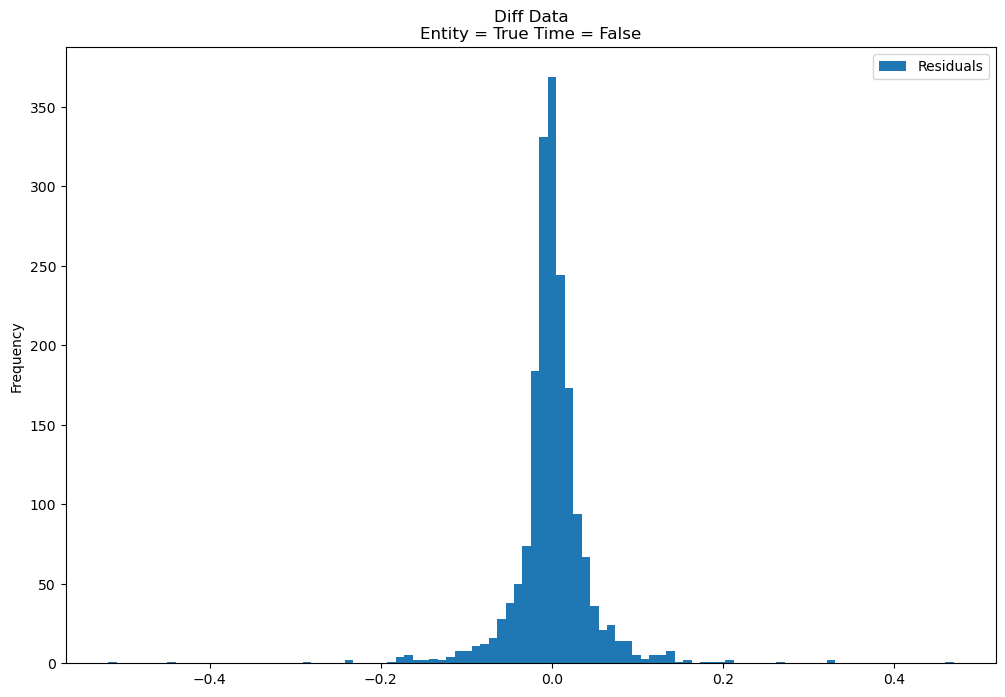

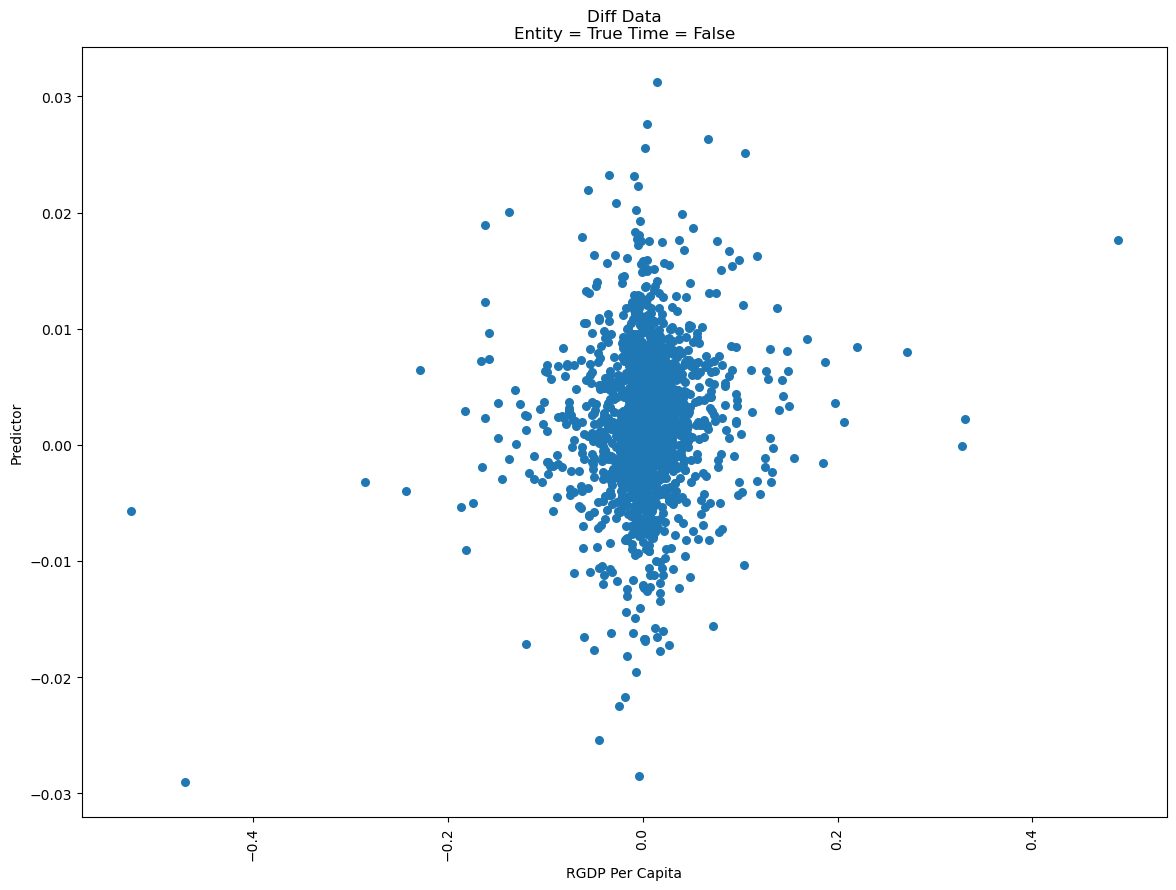

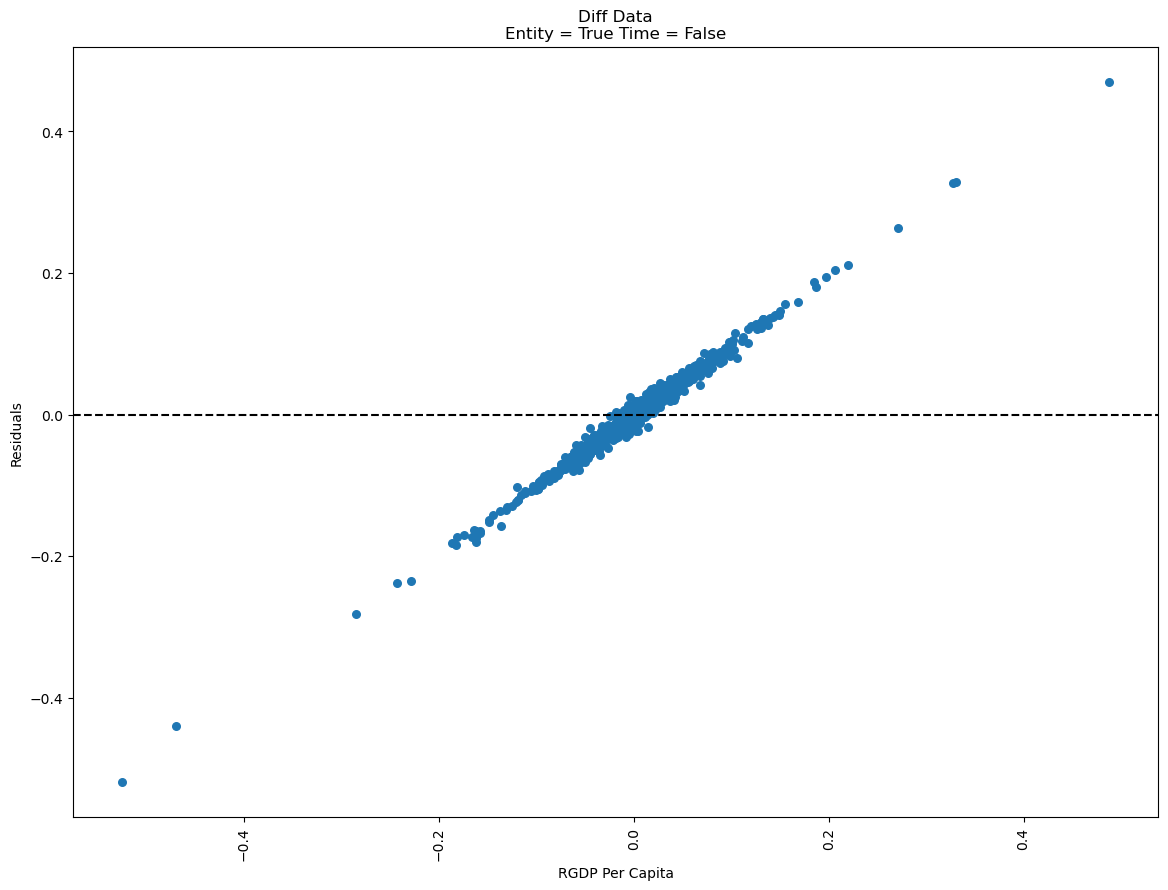

Diff Data
Entity = False
Time = True
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0192
Estimator:                   PanelOLS   R-squared (Between):              0.0911
No. Observations:                1882   R-squared (Within):               0.0139
Date:                Mon, May 06 2024   R-squared (Overall):              0.0150
Time:                        23:59:20   Log-likelihood                    3315.9
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      6.0831
Entities:                         149   P-value                           0.0000
Avg Obs:                       12.631   Distribution:                  F(6,1862)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust): 

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


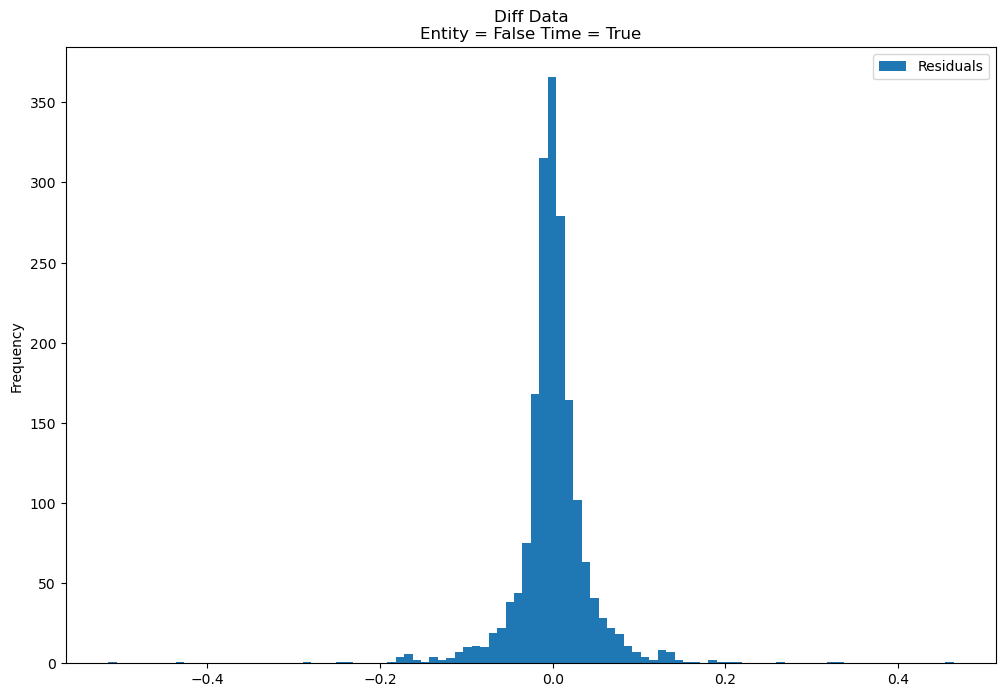

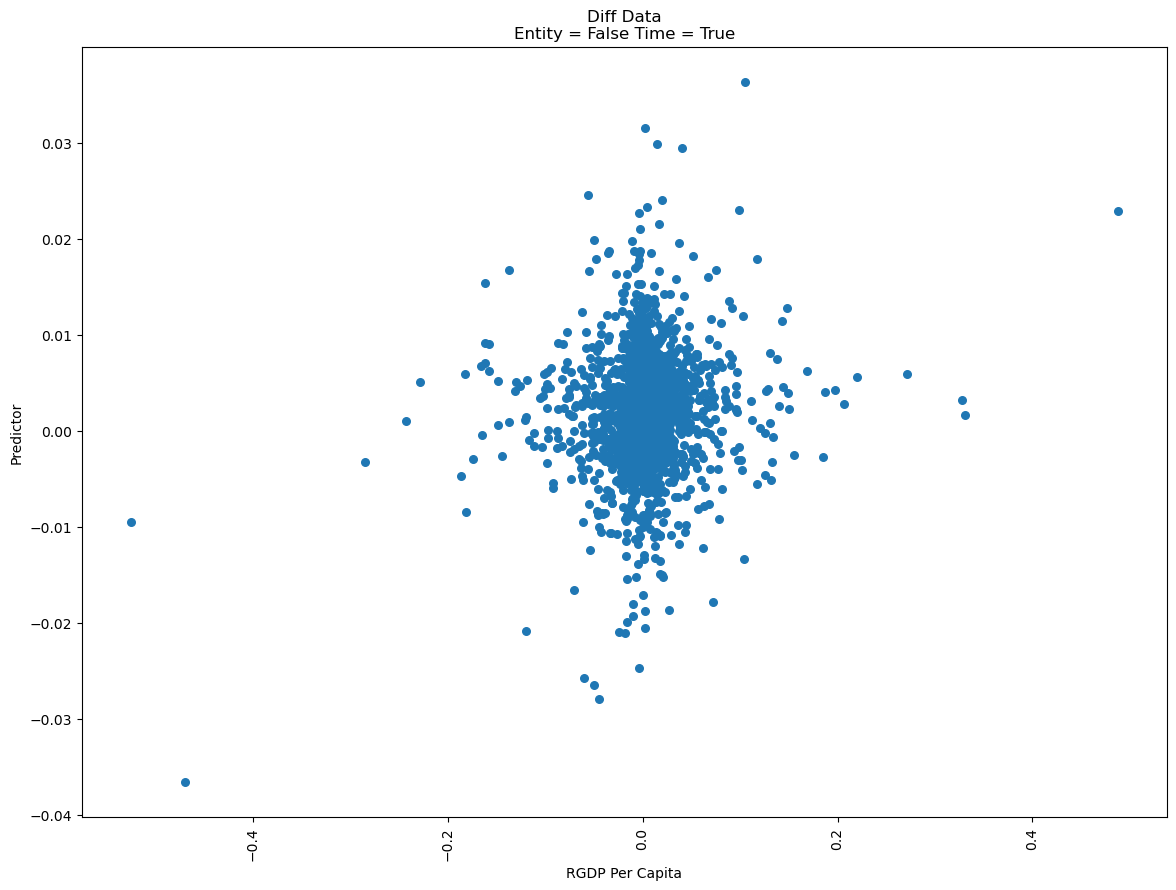

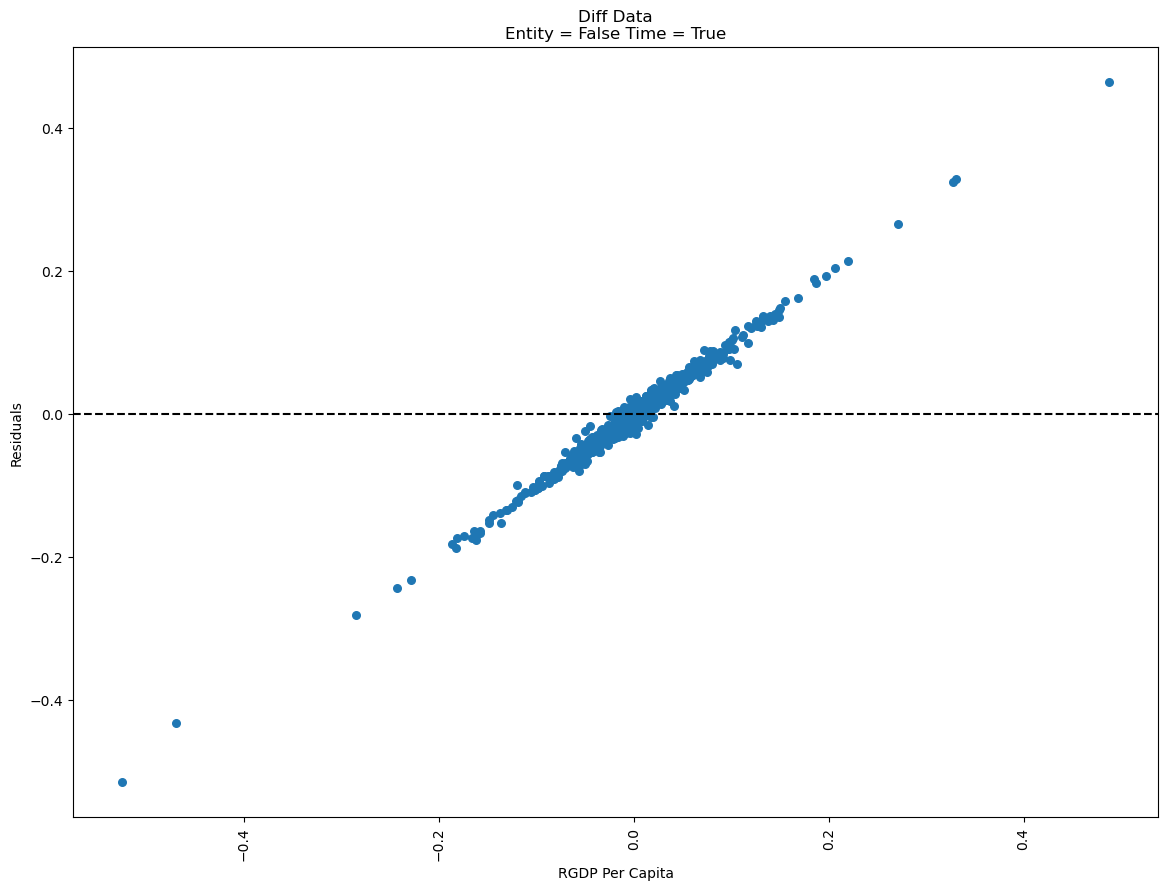

Diff Data
Entity = False
Time = False
Diff Data
                          PanelOLS Estimation Summary                           
Dep. Variable:        RGDP Per Capita   R-squared:                        0.0173
Estimator:                   PanelOLS   R-squared (Between):              0.1713
No. Observations:                1882   R-squared (Within):               0.0155
Date:                Mon, May 06 2024   R-squared (Overall):              0.0173
Time:                        23:59:22   Log-likelihood                    3134.7
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      5.4863
Entities:                         149   P-value                           0.0000
Avg Obs:                       12.631   Distribution:                  F(6,1875)
Min Obs:                       1.0000                                           
Max Obs:                       14.000   F-statistic (robust):

C:\Users\aleah\AppData\Local\Temp\ipykernel_20116\443397578.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X["Constant"] = 1
C:\Users\aleah\anaconda3\Lib\site-packages\linearmodels\panel\model.py:1219: MissingValueWarning: 
Inputs contain missing values. Dropping rows with missing observations.
  super().__init__(dependent, exog, weights=weights, check_rank=check_rank)


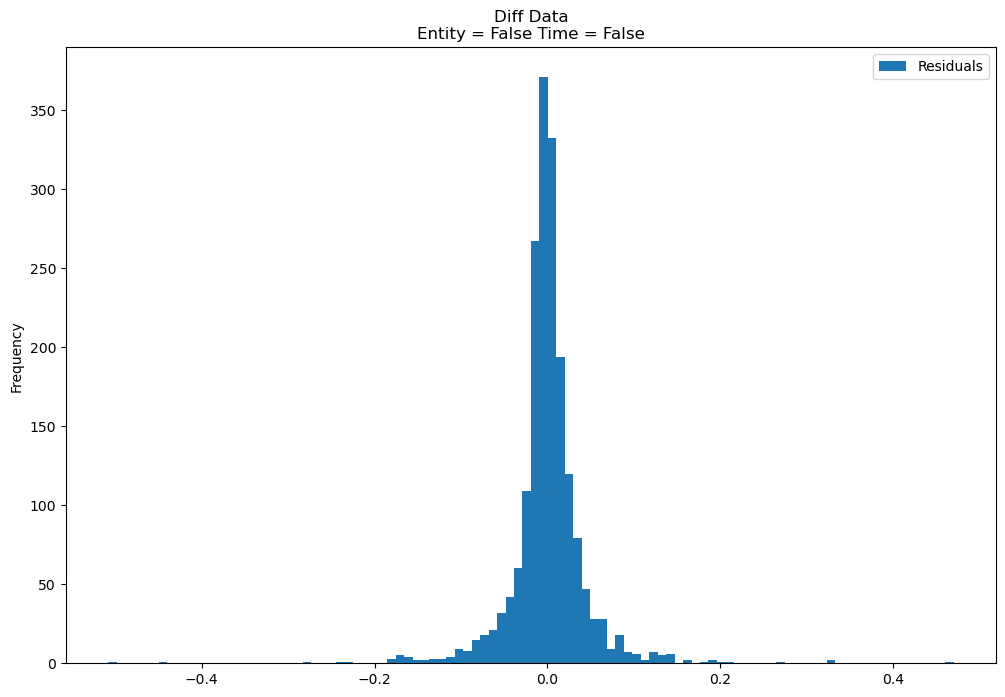

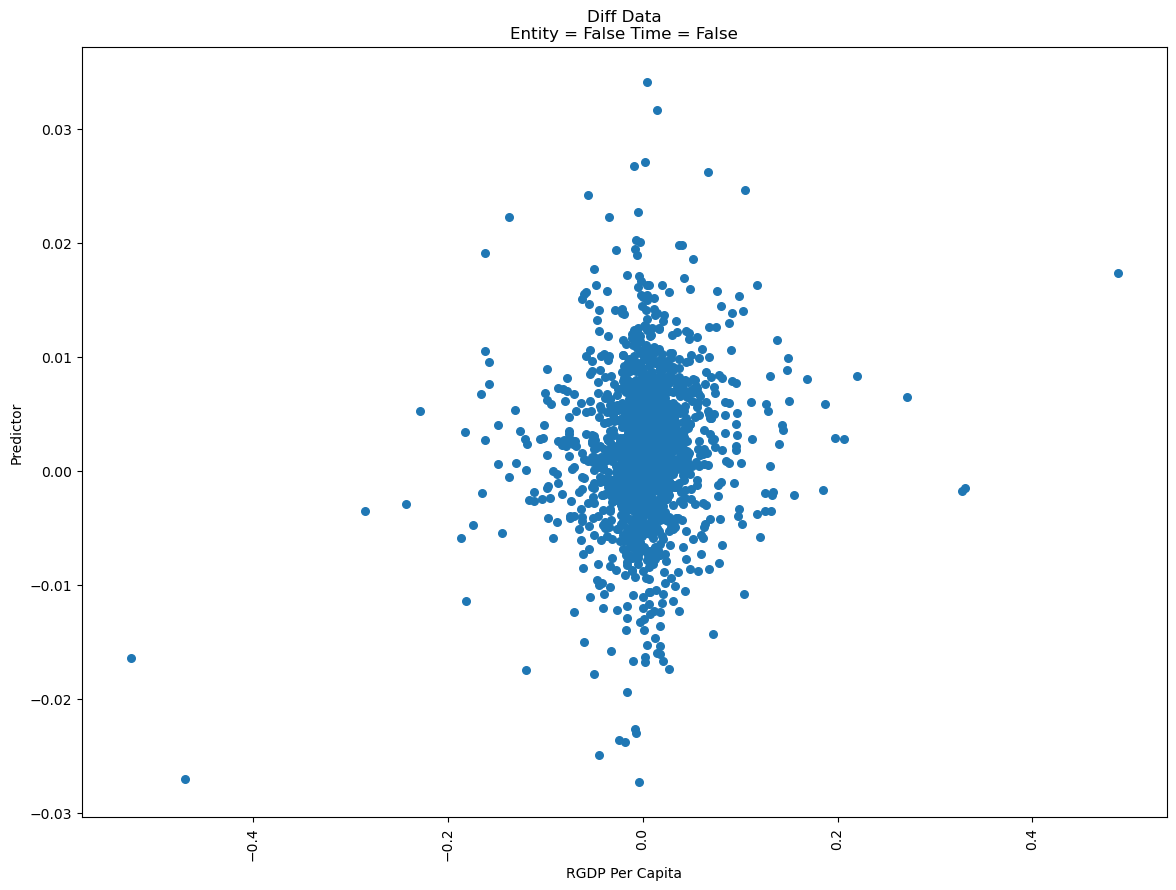

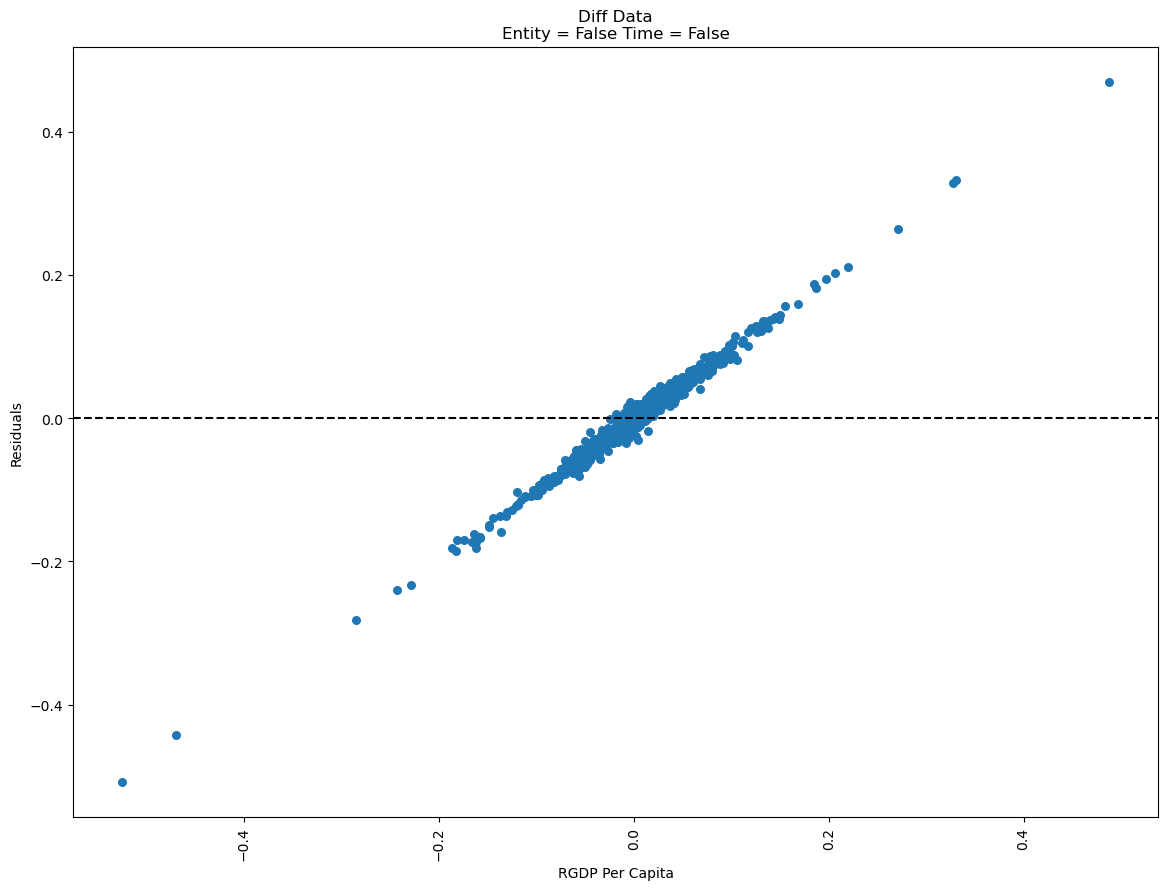

In [41]:
# rerunning everything from the panel regression section with an added lagged variable
from linearmodels import PanelOLS

# . . . .
y_name = ["RGDP Per Capita"]
X_names = ["Size of Government",
           "Legal System and Property Rights",
           "Sound Money",
           "Freedom to Trade Internationally",
           "Regulation"]

for key, data in data_dict.items():
    for entity in [True, False]:
        for time in [True, False]:
            print(key)
            print("Entity =", entity)
            print("Time =", time)
            reg_data = data_dict[key].dropna()

            reg_data["RGDP Per Capita Lagged"] = reg_data.groupby("Countries")["RGDP Per Capita"].shift(3)

            Y = reg_data[y_name]
            X = reg_data[X_names + ["RGDP Per Capita Lagged"]]
            X["Constant"] = 1

            model = PanelOLS(Y, X, entity_effects=entity, time_effects=time)
            results = model.fit(cov_type='clustered', cluster_entity=True)

            print(key, results, sep="\n")

            reg_data["Predictor"] = results.predict()
            reg_data["Residuals"] = reg_data[y_name[0]].sub(reg_data["Predictor"])

            fig, ax = plt.subplots(figsize=(12, 8))
            reg_data[["Residuals"]].plot.hist(bins=100, ax=ax)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))

            fig, ax = plt.subplots(figsize=(14, 10))
            reg_data.plot.scatter(x=y_name[0],
                                  y="Predictor",
                                  s=30, ax=ax)
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            plt.show()
            plt.close()

            fig, ax = plt.subplots(figsize=(14, 10))
            reg_data.plot.scatter(x=y_name[0],
                                  y="Residuals",
                                  s=30, ax=ax)
            ax.axhline(0, ls="--", color="k")
            plt.xticks(rotation=90)
            plt.title(key + "\nEntity = " + str(entity) + " Time = " + str(time))
            plt.show()
            plt.close()